# Lecture 31 - Pipe Networks - Python Examples

In [153]:
# boilerplate imports
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline 

In [231]:
%%html
<!-- This code makes it so we have big output windows with no scroll bars -->
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

## Example 1. Serial Network

<img src="figs/Serial_Network.png" width=350px>
<img src="figs/Serial_Network_2.png" width=350px>

|&nbsp;|Pipe 1|Pipe 2|Pipe 3| 
|---|---|---|---| 
| $L$ (m)  | 150 | 80 | 100 | 
| $D$ (m)  | 0.45 | 0.04 | 0.05 | 
| $k$ (mm) | 0.12 | 0.2 | 0.24 |

*<center>Ignore minor losses*


In [232]:
# Define variables
L = np.array([150, 80, 100]) # m (pipe length)
D = np.array([0.045, 0.04, 0.05]) # m (pipe diameter)
k = np.array([0.12e-3, 0.20e-3, 0.24e-3]) # m (effective roughness)

# properties/constants
nu = 1e-6 # m^2/s (water, kinematic viscosity)
g = 9.807 #m^2/s (gravitational const)

In [233]:
# define functions useful for every example
def v(Q, D):
    return 4*Q/(np.pi*D**2)

def Re(v, D):
    return v*D/nu

def f_Haaland( Re, k, D ):
    # Re = Reynolds number
    # eps = k/D
    return ( 3.6 * np.log10(6.9/Re + (k/D*1/3.7)**(1.11)) )**(-2)

def hL(Q, D, k, L):
    v_n = v(Q, D)
    Re_n = Re(v_n, D)
    f_n = f_Haaland(Re_n, k, D);
    return v_n**2/(2*g)*(4*L*f_n/D)

### Example 1(A) -- Already Know Re
Find total head loss, $h_{L, tot}$ if $Q = 2.616$ L/s

In [234]:
# Find the head loss
Q = 2.616e-3 # m^3/s (flow rate)
hL_tot = 0
hL_i = np.zeros(len(D))

for i in range(len(D)):
    hL_i[i] = hL(Q, D[i], k[i], L[i])
    hL_tot += hL_i[i]

In [235]:
# print the answer in a table
print('-'*66)
print('%4s%12s%12s%12s%12s%12s'%('i', 'D (m)', 'v (m/s)', 'Re', 'f', 'hL_i (m)'))
print('-'*66)
for i in range(len(D)):
    v_i = v(Q, D[i])
    Re_i = Re(v_i, D[i])
    f_i = f_Haaland(Re_i, k[i], D[i])
    print('%4d%12.3e%12.3e%12.3e%12.3e%12.3e'%(i, D[i], v_i, Re_i, f_i, hL_i[i]) )
print('-'*66)
print('\nhL_tot = %8.3f (m)'%hL_tot)

------------------------------------------------------------------
   i       D (m)     v (m/s)          Re           f    hL_i (m)
------------------------------------------------------------------
   0   4.500e-02   1.645e+00   7.402e+04   6.760e-03   1.243e+01
   1   4.000e-02   2.082e+00   8.327e+04   7.861e-03   1.389e+01
   2   5.000e-02   1.332e+00   6.662e+04   7.837e-03   5.674e+00
------------------------------------------------------------------

hL_tot =   32.002 (m)


### Example 1(B) -- Don't Know Re
Find flow rate, $Q$, when $h_L = 32$ m.

In [236]:
# clear variables from example 1(A)
for var in ['hL_tot', 'Q', 'hL_i']:
    if var in globals():
        del globals()[var]

In [237]:
# Find the Q
h_pump = 32 # m (fluid head)

def hL_tot(Q, D, k, L):
    hL_sum = 0
    for i in range(len(D)):
        hL_i = hL(Q, D[i], k[i], L[i])
        hL_sum += hL_i
    return hL_sum

# function in standard form: phi(Q) = 0
def phi(Q):
    return h_pump - hL_tot(Q, D, k, L)

Q_guess = 3e-3
Q = opt.fsolve( phi, Q_guess )[0]

print('Q = %8.3f (L/s)'%(Q*1e3))

Q =    2.616 (L/s)


### System Demand Curve for 1(B)

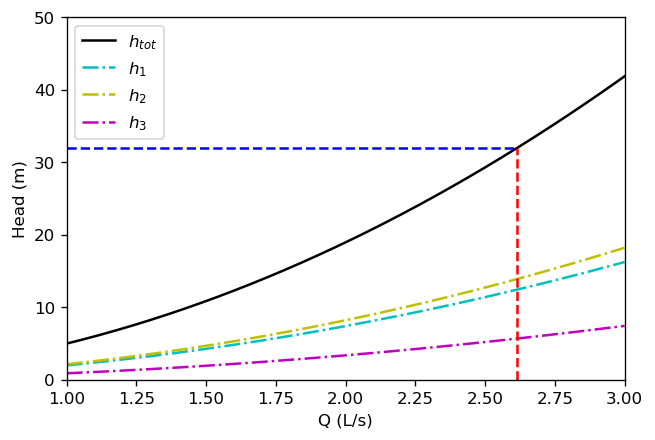

In [238]:
Q_i = np.linspace(1e-3, 3e-3, 201)

plt.figure(dpi=120)
plt.plot(Q_i*1e3, hL_tot(Q_i, D, k, L), 'k-')
plt.plot(Q_i*1e3, hL(Q_i, D[0], k[0], L[0]), 'c-.')
plt.plot(Q_i*1e3, hL(Q_i, D[1], k[1], L[1]), 'y-.')
plt.plot(Q_i*1e3, hL(Q_i, D[2], k[2], L[2]), 'm-.')

plt.plot([1, Q*1e3], [h_pump, h_pump], 'b--')
plt.plot([Q*1e3, Q*1e3], [0, htot_Q], 'r--')
plt.xlim([1, 3])
plt.ylim([0, 50])
plt.xlabel('Q (L/s)')
plt.ylabel('Head (m)')
plt.legend(['$h_{tot}$', '$h_{1}$', '$h_{2}$', '$h_{3}$'])
plt.show()

## Example 2. Parallel Network

<img src="figs/Parallel_Network.png" width=350px>
<img src="figs/Parallel_Network_2.png" width=350px>

|&nbsp;|Pipe 1|Pipe 2|Pipe 3| 
|---|---|---|---| 
| $L$ (m)  | 150 | 80 | 100 | 
| $D$ (m)  | 0.45 | 0.04 | 0.05 | 
| $k$ (mm) | 0.12 | 0.2 | 0.24 |

*<center>Ignore minor losses*
*<center>Same pipes as serial example*


### Example 2(A) -- Already Know Re
Given that $Q_{1} = 1$ L/s,  find total head loss $h_{L}$

In [239]:
# clear variables from example 1(B)
for var in ['hL_tot', 'phi', 'Q', 'Q_i', 'hL_i']:
    if var in globals():
        del globals()[var]

In [240]:
Q1 = 1e-3 # m^3/s (flow rate)

hL_i = hL(Q1, D[0], k[0], L[0])
hL_tot = hL_i # remember hL_tot = hL_i

print('head loss: %8.3f (m)'%hL_tot)

head loss:    1.969 (m)


### Example 2(B) -- Don't Know Re
Given that $Q_{1} = 1$ L/s, and that $h_{L} = 1.969$ m, what is the total flow rate, $Q_{tot}$?

In [241]:
# We have to solve for each Q iteratively
def phi(Q, D, k, L):
    return hL_tot - hL(Q, D, k, L)

Q_i = np.zeros(3)
Q_i[0] = Q1 # already know this from above.
Q_i[1] = fsolve( lambda x: phi(x, D[1], k[1], L[1]), 1e-3)[0]
Q_i[2] = fsolve( lambda x: phi(x, D[2], k[2], L[2]), 1e-3)[0]
Q_tot = np.sum(Q_i)

In [242]:
# print the answer in a table
print('-'*66)
print('%4s%12s%12s%12s%12s%12s'%('i', 'D (m)', 'Q (L/s)', 'Re', 'f', 'hL_i (m)'))
print('-'*66)
for i in range(len(D)):
    v_i = v(Q_i[i], D[i])
    Re_i = Re(v_i, D[i])
    f_i = f_Haaland(Re_i, k[i], D[i])
    print('%4d%12.3e%12.3e%12.3e%12.3e%12.3e'%(i, D[i], Q_i[i]*1e3, Re_i, f_i, hL_i) )
print('-'*66)
print('\nQ_tot = %8.3f (L/s)'%(Q_tot*1e3))

------------------------------------------------------------------
   i       D (m)     Q (L/s)          Re           f    hL_i (m)
------------------------------------------------------------------
   0   4.500e-02   1.000e+00   2.829e+04   7.328e-03   1.969e+00
   1   4.000e-02   9.607e-01   3.058e+04   8.262e-03   1.969e+00
   2   5.000e-02   1.520e+00   3.872e+04   8.053e-03   1.969e+00
------------------------------------------------------------------

Q_tot =    3.481 (L/s)


### Example 2(C) -- Don't Know Re
Given that $Q_{tot} = 3.48$ L/s, what is the total head loss $h_{L, tot}$?

In [248]:
# clear variables from example 2(A) & 2(B)
for var in ['Q1', 'v_i', 'Re_i', 'f_i', 'Q_tot', 'hL_tot', 'phi', 'Q', 'Q_i', 'hL_i', 'hL_all']:
    if var in globals():
        del globals()[var]

In [249]:
# solve 4 equations for 4 unknowns

Q_tot = 3.48e-3 # m^3/s

def phi(Q_i, hL_tot, D, k, L):
    eq1 = hL_tot - hL(Q_i[0], D[0], k[0], L[0])
    eq2 = hL_tot - hL(Q_i[1], D[1], k[1], L[1])
    eq3 = hL_tot - hL(Q_i[2], D[2], k[2], L[2])
    eq4 = Q_tot - Q_i[0] - Q_i[1] - Q_i[2]
    
    return np.array([eq1, eq2, eq3, eq4])

Q_guess = np.array([1e-3, 1e-3, 1e-3])
hL_guess = 2.0
soln_guess = np.append(Q_guess, hL_guess)

phi_solve = lambda x: phi( x[0:3], x[3], D, k, L )
soln = fsolve( phi_solve, soln_guess )

Q_i = soln[0:3]
hL_tot = soln[3]
hL_i = hL_tot

In [250]:
# print the answer in a table
print('-'*66)
print('%4s%12s%12s%12s%12s%12s'%('i', 'D (m)', 'Q (L/s)', 'Re', 'f', 'hL_i (m)'))
print('-'*66)
for i in range(len(D)):
    v_i = v(Q_i[i], D[i])
    Re_i = Re(v_i, D[i])
    f_i = f_Haaland(Re_i, k[i], D[i])
    print('%4d%12.3e%12.3e%12.3e%12.3e%12.3e'%(i, D[i], Q_i[i]*1e3, Re_i, f_i, hL_i) )
print('-'*66)
print('\nQ_tot = %8.3f (L/s)'%(Q_tot*1e3))
print('hL_tot = %8.3f (L/s)'%(hL_tot))

------------------------------------------------------------------
   i       D (m)     Q (L/s)          Re           f    hL_i (m)
------------------------------------------------------------------
   0   4.500e-02   9.997e-01   2.828e+04   7.329e-03   1.968e+00
   1   4.000e-02   9.604e-01   3.057e+04   8.262e-03   1.968e+00
   2   5.000e-02   1.520e+00   3.871e+04   8.053e-03   1.968e+00
------------------------------------------------------------------

Q_tot =    3.480 (L/s)
hL_tot =    1.968 (L/s)


### System Demand Curve for 2(C)

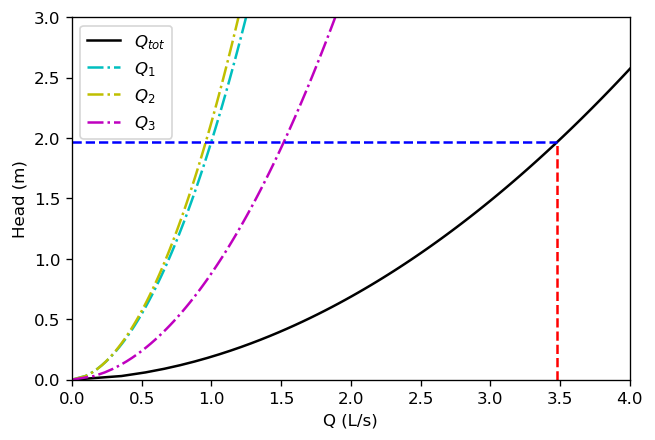

In [253]:
# Iteratively solve for Q's at a given head loss
hL_tot_array = np.linspace(1e-4, 3.0, 101)
Q_1 = np.zeros(101)
Q_2 = np.zeros(101)
Q_3 = np.zeros(101)
Q_tot_array = np.zeros(101)

# We have to solve iteratively for each Q, like in 2(a),
# but we don't have to solve 4 equations and 4 unknowns
for i in range(len(hL_tot_array)):
    Q_1[i] = fsolve( lambda Q: hL_tot_array[i] - hL(Q, D[0], k[0], L[0]), 1e-3 )
    Q_2[i] = fsolve( lambda Q: hL_tot_array[i] - hL(Q, D[1], k[1], L[1]), 1e-3 )
    Q_3[i] = fsolve( lambda Q: hL_tot_array[i] - hL(Q, D[2], k[2], L[2]), 1e-3 )
    Q_tot_array[i] = Q_1[i]+Q_2[i]+Q_3[i]
    
plt.figure(dpi=120);
plt.plot(Q_tot_array*1e3, hL_tot_array, 'k-', label='$Q_{tot}$')
plt.plot(Q_1*1e3, hL_tot_array, 'c-.', label='$Q_{1}$')
plt.plot(Q_2*1e3, hL_tot_array, 'y-.', label='$Q_{2}$')
plt.plot(Q_3*1e3, hL_tot_array, 'm-.', label='$Q_{3}$')

plt.plot([0, Q_tot*1e3], [hL_tot, hL_tot], 'b--')
plt.plot([Q_tot*1e3, Q_tot*1e3], [0, hL_tot], 'r--')

plt.xlim([0, 4])
plt.ylim([0, 3])
plt.xlabel('Q (L/s)')
plt.ylabel('Head (m)')
plt.legend()
plt.show()